In [1]:
import pickle
import structures
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.layers import LSTM
from keras.layers import Embedding
from keras.optimizers import RMSprop


from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from sklearn.metrics import accuracy_score


import keras
from keras.utils import to_categorical

from matplotlib import pyplot as plt
from IPython.display import clear_output

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
Songs = pickle.load(open("bach.pickle", "rb"))

print(type(Songs[0]))

<class 'structures.Song'>


In [3]:
all_chords = []
max_len = 0

In [4]:
for song in Songs:
    for track in song.tracks:
        for chord in track.chords: 
            new_chord = np.zeros(5-len(chord.notes))
            new_chord = np.append(np.array([note.number for note in chord.notes]), new_chord)
          #  print(new_chord)
            all_chords.append(new_chord)

In [5]:
from collections import Counter

In [6]:
print(len(all_chords))

5665


In [7]:

unique_chords = np.unique(all_chords, axis=0)

In [8]:
print(unique_chords)

[[22. 23. 25. 29.  0.]
 [22. 23. 25. 30.  0.]
 [22. 23. 26. 31.  0.]
 ...
 [29. 31. 33.  0.  0.]
 [29. 32.  0.  0.  0.]
 [29. 33.  0.  0.  0.]]


In [9]:
size = len(unique_chords)
unique_chords = list(unique_chords)
coded_chords = []


print(size)

325


In [10]:
for chord in all_chords:
    for i, unique_chord in enumerate(unique_chords):
        if np.array_equal(chord, unique_chord):
            coded_chords.append(i)

In [11]:
print(len(coded_chords))

5665


In [12]:
remove_indexes = []

for i, frec in enumerate(Counter(coded_chords).values()):
    if frec == 1:
        remove_indexes.append(i)
        
print(len(remove_indexes))

79


In [13]:
unique_chords = np.delete(unique_chords, remove_indexes, axis=0)
#coded_chords = np.delete(coded_chords, remove_indexes)

print(unique_chords)

[[22. 23. 27. 30.  0.]
 [22. 23. 27. 32.  0.]
 [22. 24. 25. 29.  0.]
 ...
 [29. 31.  0.  0.  0.]
 [29. 32.  0.  0.  0.]
 [29. 33.  0.  0.  0.]]


In [14]:
size = len(unique_chords)
coded_chords = []

print(size)

246


In [15]:
for chord in all_chords:
    for i, unique_chord in enumerate(unique_chords):
        if np.array_equal(chord, unique_chord):
            coded_chords.append(i)

In [16]:
print(len(coded_chords))

5586


In [17]:
old_chords = all_chords
all_chords = []

In [18]:
for chord in old_chords:
    for unique_chord in unique_chords:
        if np.array_equal(chord, unique_chord):
            all_chords.append(chord)

In [19]:
print(len(all_chords))

5586


In [20]:
5586 / 7

798.0

In [21]:
data = [coded_chords[i:i + 7] for i in range(0, len(coded_chords)-6, 1)]



In [22]:
data = np.array(data)
data = np.reshape(data, (-1, 7))
print(data.shape)

(5580, 7)


In [23]:
data = np.array(data)

X = data[:,0:6]
y = data[:,6]

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.9, random_state=0)
print(test_X.shape)
print(train_X.shape)

(558, 6)
(5022, 6)


In [26]:
for i in range(1, 10):
    for j in range(1, 10):
        model = Sequential()
        model.add(Embedding(size + 1, i, input_length=6))
        model.add(LSTM(j))
        model.add(Dense(size, activation='softmax'))
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        model.fit(train_X, train_y, epochs=1, batch_size=1, verbose=2, validation_data=(test_X, test_y));
        print (i, j)

Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 31s - loss: 4.7371 - acc: 0.0589 - val_loss: 4.5209 - val_acc: 0.0556
1 1
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 31s - loss: 4.6475 - acc: 0.0573 - val_loss: 4.4851 - val_acc: 0.0556
1 2
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 31s - loss: 4.6392 - acc: 0.0540 - val_loss: 4.4978 - val_acc: 0.0520
1 3
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 31s - loss: 4.6230 - acc: 0.0597 - val_loss: 4.4842 - val_acc: 0.0412
1 4
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 31s - loss: 4.6089 - acc: 0.0573 - val_loss: 4.4878 - val_acc: 0.0645
1 5
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 33s - loss: 4.6166 - acc: 0.0558 - val_loss: 4.5001 - val_acc: 0.0556
1 6
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 36s - loss: 4.6164 - acc: 0.0581 - val_loss: 4.5174 - val_acc: 0.0556
1 7
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 39

 - 46s - loss: 4.6194 - acc: 0.0554 - val_loss: 4.4810 - val_acc: 0.0556
7 8
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 46s - loss: 4.6017 - acc: 0.0566 - val_loss: 4.4975 - val_acc: 0.0412
7 9
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 45s - loss: 4.7574 - acc: 0.0575 - val_loss: 4.5144 - val_acc: 0.0556
8 1
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 46s - loss: 4.6585 - acc: 0.0560 - val_loss: 4.4979 - val_acc: 0.0556
8 2
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 46s - loss: 4.6270 - acc: 0.0577 - val_loss: 4.4982 - val_acc: 0.0430
8 3
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 47s - loss: 4.6289 - acc: 0.0526 - val_loss: 4.4946 - val_acc: 0.0609
8 4
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 47s - loss: 4.6152 - acc: 0.0536 - val_loss: 4.4760 - val_acc: 0.0591
8 5
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 47s - loss: 4.6085 - acc: 0.0568 - val_loss: 4.4785 - val_a

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209294). Check your callbacks.
  % delta_t_median)


 - 70s - loss: 4.6116 - acc: 0.0571 - val_loss: 4.5005 - val_acc: 0.0520
8 9
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 56s - loss: 4.7468 - acc: 0.0510 - val_loss: 4.5319 - val_acc: 0.0412
9 1
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.6669 - acc: 0.0528 - val_loss: 4.5055 - val_acc: 0.0502
9 2
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 49s - loss: 4.6385 - acc: 0.0534 - val_loss: 4.4884 - val_acc: 0.0556
9 3
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 49s - loss: 4.6163 - acc: 0.0542 - val_loss: 4.4865 - val_acc: 0.0556
9 4
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 49s - loss: 4.6210 - acc: 0.0568 - val_loss: 4.4968 - val_acc: 0.0556
9 5
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.6197 - acc: 0.0552 - val_loss: 4.4896 - val_acc: 0.0556
9 6
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 49s - loss: 4.6063 - acc: 0.0552 - val_loss: 4.4659 - val_a

In [ ]:
for i in range(11, 20):
    for j in range(11, 20):
        model = Sequential()
        model.add(Embedding(size + 1, i, input_length=6))
        model.add(LSTM(j))
        model.add(Dense(size, activation='softmax'))
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        model.fit(train_X, train_y, epochs=1, batch_size=1, verbose=2, validation_data=(test_X, test_y));
        print (i, j)

Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.6158 - acc: 0.0601 - val_loss: 4.4378 - val_acc: 0.0609
11 11
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 51s - loss: 4.5862 - acc: 0.0635 - val_loss: 4.3126 - val_acc: 0.0842
11 12
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 51s - loss: 4.6004 - acc: 0.0665 - val_loss: 4.3291 - val_acc: 0.0860
11 13
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 52s - loss: 4.5700 - acc: 0.0731 - val_loss: 4.3151 - val_acc: 0.0735
11 14
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 52s - loss: 4.6072 - acc: 0.0615 - val_loss: 4.3497 - val_acc: 0.0735
11 15
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 52s - loss: 4.5691 - acc: 0.0669 - val_loss: 4.2528 - val_acc: 0.0878
11 16
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 1216s - loss: 4.6062 - acc: 0.0635 - val_loss: 4.4208 - val_acc: 0.0824
11 17
Train on 5022 samples, validate on 558 samples

In [25]:
for i in range(21, 30):
    for j in range(21, 30):
        model = Sequential()
        model.add(Embedding(size + 1, i, input_length=6))
        model.add(LSTM(j))
        model.add(Dense(size, activation='softmax'))
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        model.fit(train_X, train_y, epochs=1, batch_size=1, verbose=2, validation_data=(test_X, test_y));
        print (i, j)

Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 34s - loss: 4.5627 - acc: 0.0667 - val_loss: 4.2181 - val_acc: 0.0950
21 21
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 35s - loss: 4.5260 - acc: 0.0765 - val_loss: 4.1930 - val_acc: 0.1004
21 22
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 35s - loss: 4.4857 - acc: 0.0783 - val_loss: 4.1343 - val_acc: 0.0968
21 23
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 35s - loss: 4.4851 - acc: 0.0812 - val_loss: 4.1343 - val_acc: 0.0914
21 24
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 36s - loss: 4.5822 - acc: 0.0611 - val_loss: 4.3339 - val_acc: 0.0753
21 25
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 36s - loss: 4.4736 - acc: 0.0802 - val_loss: 4.1273 - val_acc: 0.0896
21 26
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 36s - loss: 4.4976 - acc: 0.0751 - val_loss: 4.1283 - val_acc: 0.0932
21 27
Train on 5022 samples, validate on 558 samples
E

 - 49s - loss: 4.4580 - acc: 0.0830 - val_loss: 4.0606 - val_acc: 0.1057
27 27
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.4850 - acc: 0.0804 - val_loss: 4.0874 - val_acc: 0.0986
27 28
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.4075 - acc: 0.0892 - val_loss: 4.0459 - val_acc: 0.1147
27 29
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 49s - loss: 4.4495 - acc: 0.0900 - val_loss: 4.0954 - val_acc: 0.0986
28 21
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 50s - loss: 4.4357 - acc: 0.0838 - val_loss: 4.1051 - val_acc: 0.0717
28 22
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 51s - loss: 4.4869 - acc: 0.0795 - val_loss: 4.1515 - val_acc: 0.0789
28 23
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 51s - loss: 4.4184 - acc: 0.0866 - val_loss: 4.0752 - val_acc: 0.1075
28 24
Train on 5022 samples, validate on 558 samples
Epoch 1/1
 - 51s - loss: 4.4719 - acc: 0.0783 - val_loss: 

Возьмем параметры 26 29

In [24]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

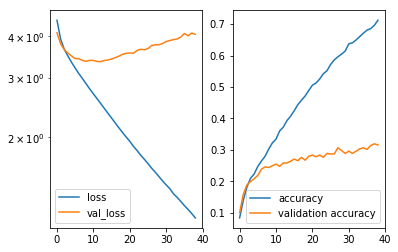

In [25]:
model = Sequential()
model.add(Embedding(size + 1, 26, input_length=6))
model.add(LSTM(29))
model.add(Dense(size, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_X, train_y, epochs=39, batch_size=1, verbose=2, validation_data=(test_X, test_y), callbacks=[plot]);

In [26]:
predicted_chords = np.array(test_X[:1])
answer = test_X[0]

for i in range(0, len(test_X)-1):
    current_chord = (model.predict(predicted_chords[i:i+1])).argmax()
    answer = np.append(answer, current_chord)
    new_chords = predicted_chords[i][-5:]
    new_chords = np.append(new_chords, current_chord)
    predicted_chords = np.vstack((predicted_chords, new_chords))


In [27]:
encoded_answer = []

for chord in answer:
    encoded_answer.append(unique_chords[chord])

In [31]:
print(encoded_answer)

[array([24., 29., 32.,  0.,  0.]), array([22., 26., 32.,  0.,  0.]), array([22., 26.,  0.,  0.,  0.]), array([22., 27., 31.,  0.,  0.]), array([22., 25., 28., 31.,  0.]), array([24., 27., 29., 33.,  0.]), array([22., 25., 29.,  0.,  0.]), array([22., 24., 25., 29.,  0.]), array([22., 25., 29.,  0.,  0.]), array([24., 29., 33.,  0.,  0.]), array([24., 27., 29., 33.,  0.]), array([22., 24., 29.,  0.,  0.]), array([24., 29., 33.,  0.,  0.]), array([24., 27., 31.,  0.,  0.]), array([22., 24., 27., 31.,  0.]), array([24., 26., 29., 31.,  0.]), array([24., 27., 29., 33.,  0.]), array([22., 26., 29.,  0.,  0.]), array([22., 26., 29.,  0.,  0.]), array([22., 27., 31.,  0.,  0.]), array([22., 27., 31., 32.,  0.]), array([22., 26., 29.,  0.,  0.]), array([22., 26., 29., 32.,  0.]), array([22., 27., 31.,  0.,  0.]), array([22., 27., 31.,  0.,  0.]), array([24., 27., 31.,  0.,  0.]), array([24., 27., 31., 33.,  0.]), array([22., 26., 29.,  0.,  0.]), array([24., 27., 33.,  0.,  0.]), array([22., 2

In [36]:
chords = []

for encoded_chord in encoded_answer:
    notes = []
    for encoded_note in encoded_chord:
        if encoded_note != 0.:
            note = structures.Note(int(encoded_note) + 50)
            notes.append(note)
    chord = structures.Chord(notes, 32, 127)
    chords.append(chord)
    
track = [structures.Track(chords=chords)]
song = structures.Song(tracks=track)

In [37]:
song.save("bach")